<a href="https://colab.research.google.com/github/benard3360-star/new/blob/main/Sports_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Dataset includes soccer player ratings. The analysis is in three parts.
Data Cleaning and Analysis
Data Plotting
Machine Learning

In [ ]:
#Include libraries to be used
%matplotlib inline
import matplotlib.pyplot as plt
from bokeh.io import output_notebook
from bokeh import models, palettes, transform
from bokeh.plotting import figure, show
import pandas as pd
#import pandas_profiling
import pydotplus
from scipy.cluster import hierarchy
import seaborn as sns
from sklearn import decomposition, preprocessing, cluster, tree
from sklearn import cluster, decomposition, pipeline, preprocessing
from yellowbrick.cluster.silhouette import SilhouetteVisualizer
import statsmodels


Data Cleaning and Analysis

In [ ]:
#Import dataset
df = pd.read_csv('https://raw.githubusercontent.com/chrisnjunge/DStest/master/soccerratings.csv')
#df = pd.read_csv('https://raw.githubusercontent.com/chrisnjunge/DStest/master/W3Store7.csv')


In [ ]:
df.head

In [ ]:
#df = df2[["Name","Nationality","Club","Club_Position","Rating","Height","Weight","Birth_Date","Age","Work_Rate","Weak_foot"]]

In [ ]:
df.head

In [ ]:
df.dtypes

In [ ]:
df.shape

(17588, 53)

In [ ]:
def create_agebin(df):
    return pd.cut(df.Age, bins=5, labels=[str(x) for x in range(1, 6)])

cs2 = lambda df: pd.cut(df.Age, bins=5, labels=[str(x) for x in range(1, 6)])

def clean_col(col):
  return col.replace(' ', '').replace('.', '').replace('/', '')

#q6 = df.Q6.apply(limit_Nationality).rename('Nationality')

def tweak_alta(df):
  return (df
      .rename(columns=clean_col)
      .assign(Birth_Date=pd.to_datetime(df.Birth_Date),
              AGEBIN=create_agebin,
              #AGEBIN=lambda df_: pd.cut(df_.Age, bins=10, labels=[str(x) for x in range(1, 11)]),
              MONTH=lambda df_: df_.Birth_Date.dt.month,
              QTR=lambda df_: df_.Birth_Date.dt.quarter,
              YEAR=lambda df_: df_.Birth_Date.dt.year,
              DAY=lambda df_: df_.Birth_Date.dt.day_name())
      [["Rating","Age","AGEBIN","Weak_foot","MONTH","QTR"]]

  )


In [ ]:
df = tweak_alta(df)

In [ ]:
df.dtypes

Rating          int64
Age             int64
AGEBIN       category
Weak_foot       int64
MONTH           int64
QTR             int64
dtype: object

In [ ]:
(df
 .groupby('AGEBIN')
 ['Rating']
 .describe()
)

,count,mean,std,min,25%,50%,75%,max
AGEBIN,,,,,,,,
1,6737.0,62.023601,6.777745,45.0,57.0,62.0,66.0,86.0
2,7247.0,68.393956,6.026602,46.0,65.0,68.0,72.0,93.0
3,3238.0,69.541075,5.706606,49.0,66.0,69.0,73.0,94.0
4,357.0,68.619048,5.981289,46.0,65.0,69.0,73.0,88.0
5,9.0,61.777778,9.871395,45.0,57.0,58.0,70.0,74.0


In [ ]:
df.AGEBIN.value_counts()

2    7247
1    6737
3    3238
4     357
5       9
Name: AGEBIN, dtype: int64

In [ ]:
df.MONTH.value_counts()

2     2124
1     1892
3     1700
4     1540
5     1494
7     1379
9     1371
6     1367
8     1335
10    1179
11    1125
12    1082
Name: MONTH, dtype: int64

In [ ]:
# Categorical Data
df.MONTH.value_counts(dropna=False)

2     2124
1     1892
3     1700
4     1540
5     1494
7     1379
9     1371
6     1367
8     1335
10    1179
11    1125
12    1082
Name: MONTH, dtype: int64

<Axes: >

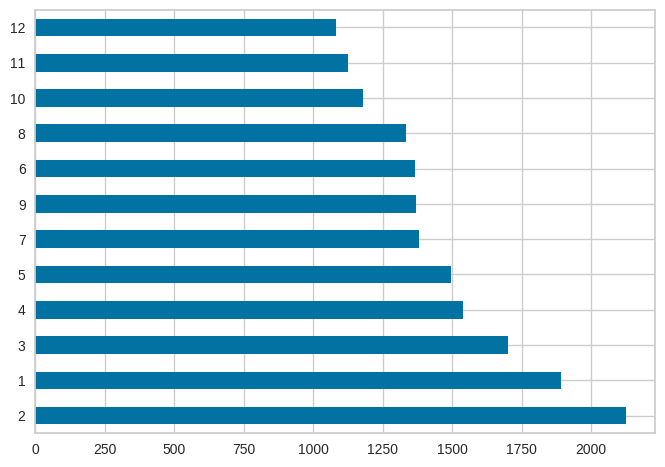

In [ ]:
df.MONTH.value_counts().plot.barh()

In [ ]:
# Numeric (Ordinal)
df.Age.mean()

25.460313850352513

In [ ]:
df.Age.max()

47

In [ ]:
df.Age.quantile(.99)

37.0

In [ ]:
df.Age.quantile([.6, .8])

0.6    26.0
0.8    30.0
Name: Age, dtype: float64

In [ ]:
df.Age.describe()

count    17588.000000
mean        25.460314
std          4.680217
min         17.000000
25%         22.000000
50%         25.000000
75%         29.000000
max         47.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

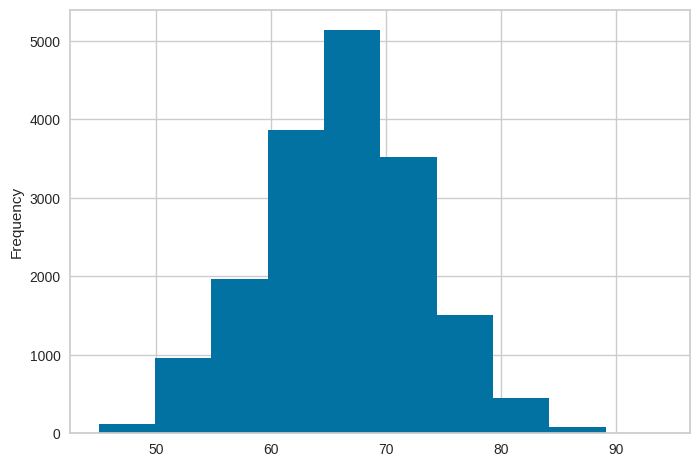

In [ ]:
df.Rating.plot.hist()

<Axes: >

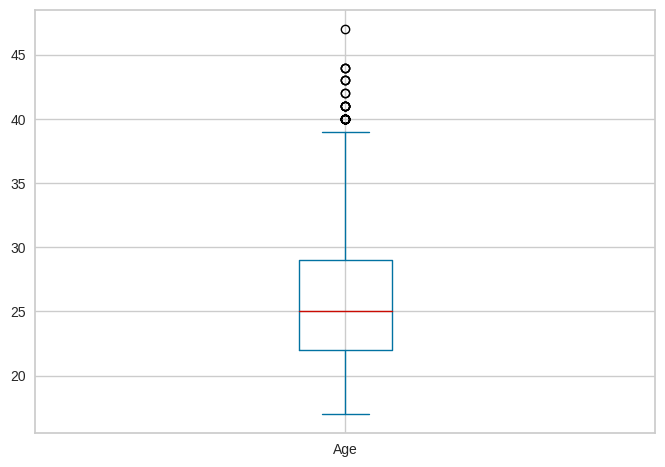

In [ ]:
# Are there outliers
df.Age.plot.box()

In [ ]:
# can also describe a dataframe
df.describe()

,Rating,Age,Weak_foot,MONTH,QTR
count,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000
mean,66.166193,25.460314,2.934103,5.850182,2.292302
std,7.083012,4.680217,0.655927,3.445984,1.114431
min,45.000000,17.000000,1.000000,1.000000,1.000000
25%,62.000000,22.000000,3.000000,3.000000,1.000000
50%,66.000000,25.000000,3.000000,6.000000,2.000000
75%,71.000000,29.000000,3.000000,9.000000,3.000000
max,94.000000,47.000000,5.000000,12.000000,4.000000


Data Plotting

In [ ]:
# Relationships - Numeric to Numeric
df.Age.corr(df.Rating)

0.4582762737282266

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


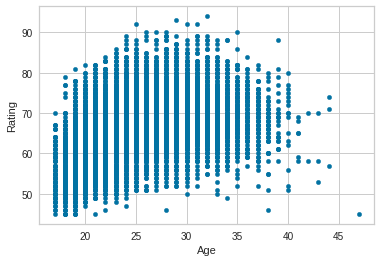

In [ ]:
df.plot.scatter(x='Age', y='Rating')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


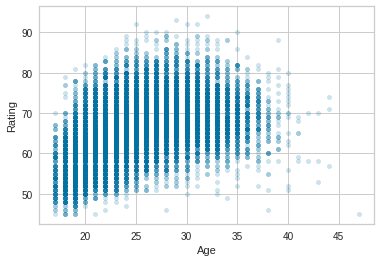

In [ ]:
df.plot.scatter(x='Age', y='Rating', alpha=.2)

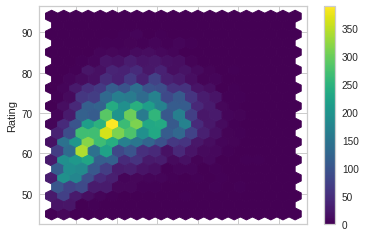

In [ ]:
# Density
df.plot.hexbin(x='Age', y='Rating', gridsize=20, cmap='viridis')

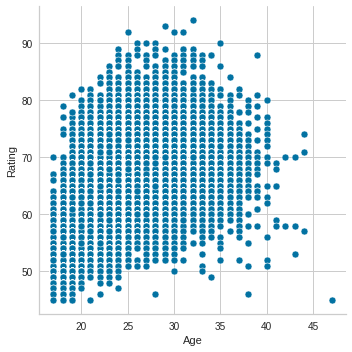

In [ ]:
sns.relplot(x='Age', y='Rating', data=df)

In [ ]:
df.columns

Index(['Rating', 'Age', 'AGEBIN', 'Weak_foot', 'MONTH', 'QTR'], dtype='object')

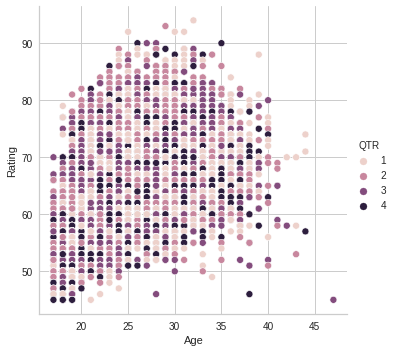

In [ ]:
sns.relplot(x='Age', y='Rating', data=df, hue='QTR')

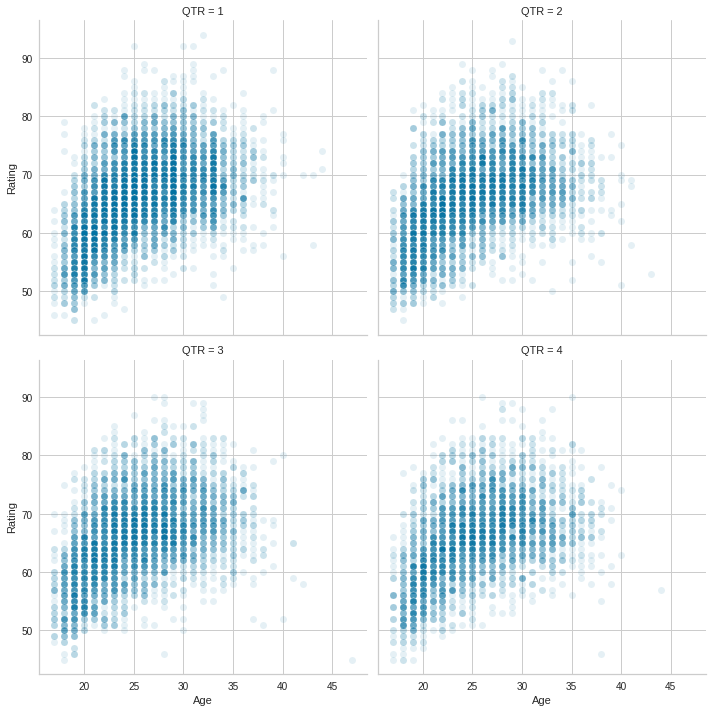

In [ ]:
sns.relplot(x='Age', y='Rating', data=df, col='QTR', col_wrap=2, alpha=.1)

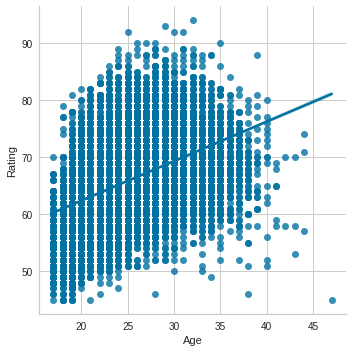

In [ ]:
sns.lmplot(x='Age', y='Rating', data=df)

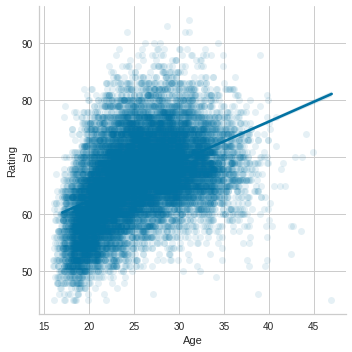

In [ ]:
# lower alpha value
sns.lmplot(x='Age', y='Rating', data=df, x_jitter=1, scatter_kws={'alpha':.1})

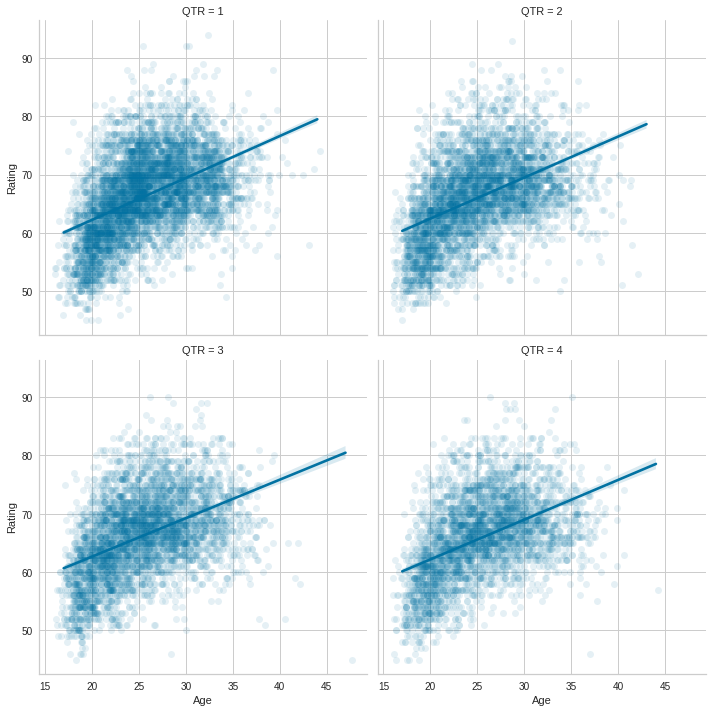

In [ ]:
sns.lmplot(x='Age', y='Rating', data=df, x_jitter=1, scatter_kws={'alpha':.1},
          col='QTR', col_wrap=2)

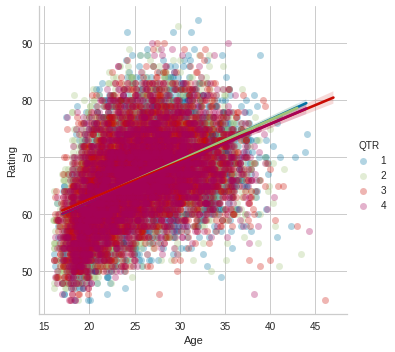

In [ ]:
sns.lmplot(x='Age', y='Rating', data=df, x_jitter=1, scatter_kws={'alpha':.3},
           hue='QTR')

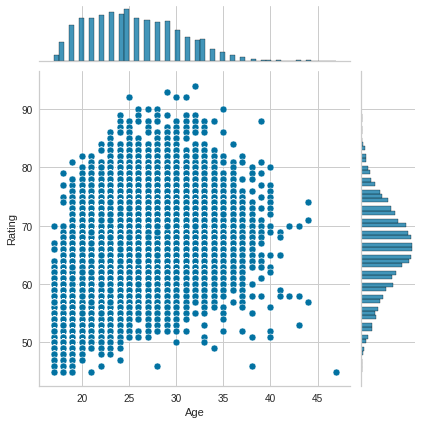

In [ ]:
# combine frequency and scatter plot
sns.jointplot(x='Age', y='Rating', data=df)

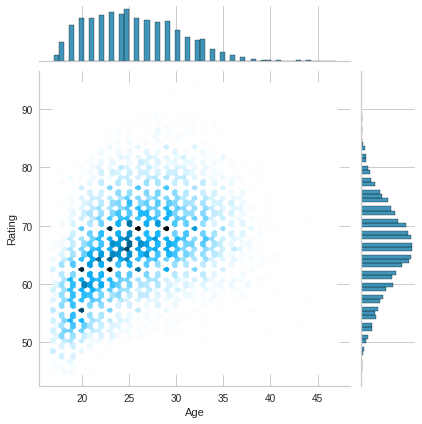

In [ ]:
# combine frequency and scatter plot
sns.jointplot(x='Age', y='Rating', data=df, kind='hex')

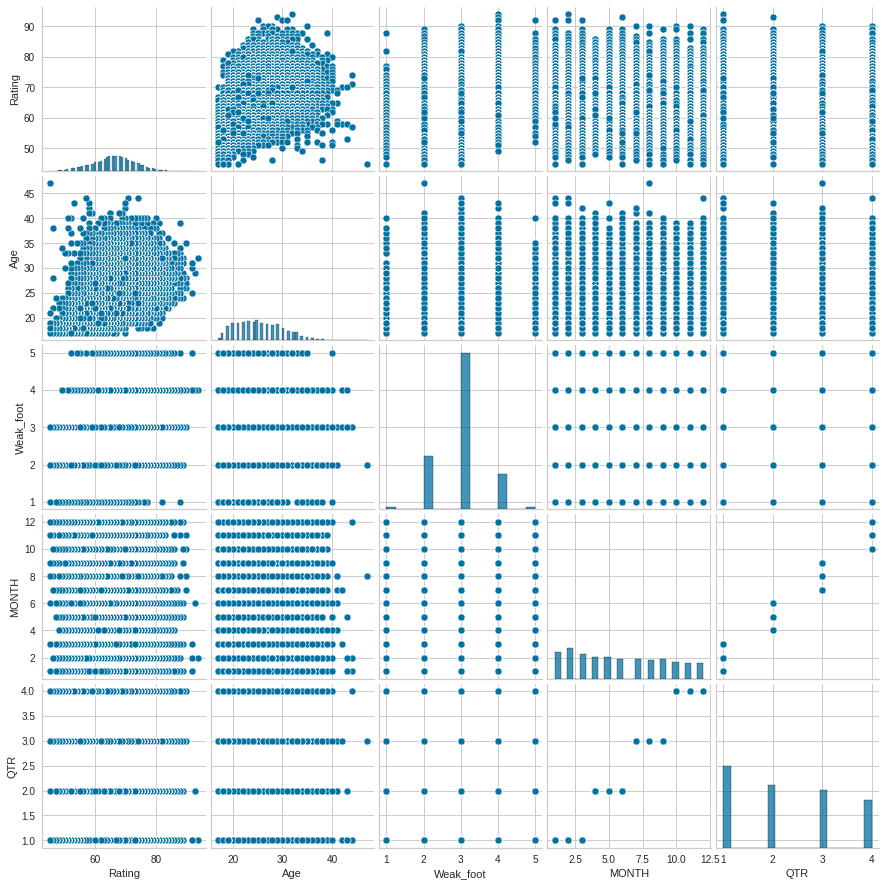

In [ ]:
sns.pairplot(df)

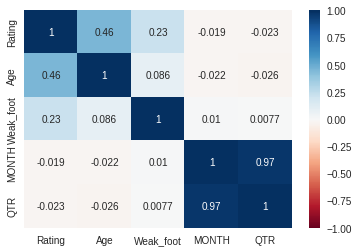

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)

In [ ]:
# 2D Categorical vs Continuous
pd.pivot_table(df, values='Rating', index='AGEBIN', aggfunc='mean')

,Rating
AGEBIN,
1,62.023601
2,68.393956
3,69.541075
4,68.619048
5,61.777778


In [ ]:
# can also do this with a groupby
(df
 .groupby('AGEBIN')
 [['Rating']]
 .mean()
)

,Rating
AGEBIN,
1,62.023601
2,68.393956
3,69.541075
4,68.619048
5,61.777778


In [ ]:
# can also do this with a groupby
(df
 .groupby('AGEBIN')
 ['Rating']
 .describe()
)

,count,mean,std,min,25%,50%,75%,max
AGEBIN,,,,,,,,
1,6737.0,62.023601,6.777745,45.0,57.0,62.0,66.0,86.0
2,7247.0,68.393956,6.026602,46.0,65.0,68.0,72.0,93.0
3,3238.0,69.541075,5.706606,49.0,66.0,69.0,73.0,94.0
4,357.0,68.619048,5.981289,46.0,65.0,69.0,73.0,88.0
5,9.0,61.777778,9.871395,45.0,57.0,58.0,70.0,74.0


In [ ]:
# 2D Categorical vs Continuous
def custom(ser):
    return ser.quantile(.99)

pd.pivot_table(df, values='Rating', index='AGEBIN',
               aggfunc=['min', 'mean', 'max', custom])

,min,mean,max,custom
,Rating,Rating,Rating,Rating
AGEBIN,,,,
1,45,62.023601,86,79.00
2,46,68.393956,93,84.00
3,49,69.541075,94,84.00
4,46,68.619048,88,81.00
5,45,61.777778,74,73.76


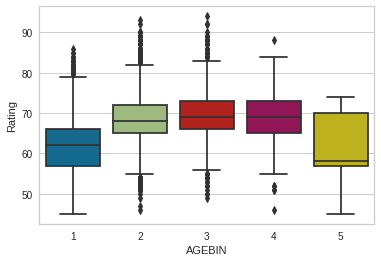

In [ ]:
# 2D Categorical vs Continuous Visualization
sns.boxplot(x='AGEBIN', y='Rating', data=df)

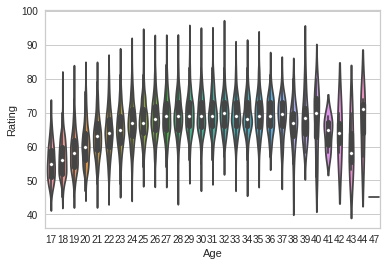

In [ ]:
# 2D Categorical vs Continuous
sns.violinplot(x='Age', y='Rating', data=df)

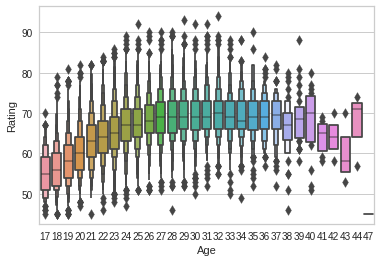

In [ ]:
# 2D Categorical vs Continuous
sns.boxenplot(x='Age', y='Rating', data=df)

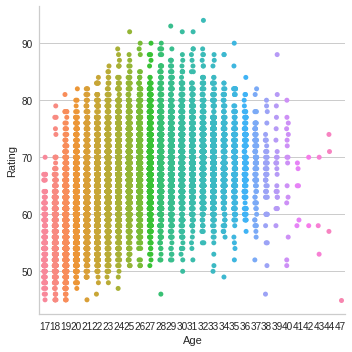

In [ ]:
ax = sns.catplot(x='Age', y='Rating', data=df)

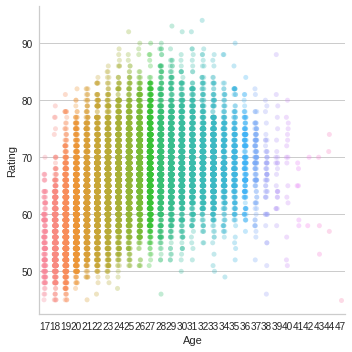

In [ ]:
ax = sns.catplot(x='Age', y='Rating', data=df, alpha=.3)

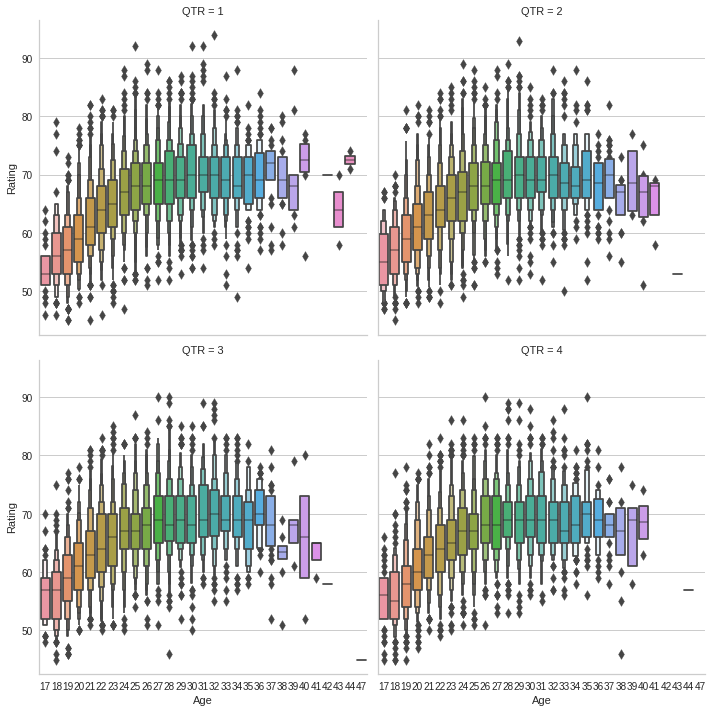

In [ ]:
# Can add more dimensions with col, row
ax = sns.catplot(x='Age', y='Rating', data=df, kind='boxen', col='QTR', col_wrap=2)

In [ ]:
# 2D Cat vs Cat

In [ ]:
(df
 .pipe(lambda df: pd.crosstab(df.AGEBIN, df.Age))
)

Age,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,47
AGEBIN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,157,533,1004,1208,1196,1283,1356,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1296,1447,1195,1134,1071,1104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,852,668,567,598,317,236,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,159,102,50,24,16,6,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,3,1


In [ ]:
# percent of occupation by country
(df
 .pipe(lambda df2: pd.crosstab(df2.Weak_foot, df2.Age))
 .pipe(lambda df2: df2.div(df2.sum(axis=1), axis=0))
 .mul(100)
)

Age,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,47
Weak_foot,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2.054795,4.794521,10.273973,5.479452,4.794521,2.054795,6.164384,6.164384,8.904110,6.164384,5.479452,4.794521,10.958904,3.424658,5.479452,0.000000,4.794521,2.054795,1.369863,2.054795,0.684932,1.369863,0.000000,0.684932,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.876261,3.531599,6.850770,8.258099,7.673925,8.178439,8.098779,6.956984,7.939458,6.558683,6.001062,5.788635,5.602762,4.301646,3.186405,2.894318,2.734997,1.380775,0.982475,0.876261,0.531067,0.371747,0.185874,0.106213,0.106213,0.000000,0.000000,0.000000,0.026553
3,0.975032,3.280481,5.941316,7.153271,6.925460,7.362858,7.654456,7.426645,8.201203,6.478950,6.415163,5.777292,6.014215,4.774923,3.799891,3.207582,3.462730,1.840714,1.366867,0.883907,0.528522,0.255149,0.127574,0.072900,0.018225,0.009112,0.018225,0.027337,0.000000
4,0.518962,1.237525,2.914172,3.992016,4.990020,5.868263,7.345309,7.864271,8.782435,8.463074,7.345309,7.664671,7.984032,6.107784,4.630739,3.832335,3.992016,2.315369,1.676647,1.037924,0.918164,0.239521,0.119760,0.079840,0.000000,0.039920,0.039920,0.000000,0.000000
5,0.507614,1.015228,3.045685,2.030457,7.614213,8.629442,9.137056,6.598985,7.614213,8.121827,6.091371,10.152284,8.629442,4.060914,3.553299,5.076142,4.060914,1.015228,2.538071,0.000000,0.000000,0.000000,0.000000,0.507614,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# percent of country by occupation
(df
 .pipe(lambda df2: pd.crosstab(df2.Weak_foot, df2.Age))
 .pipe(lambda df2: df2.div(df2.sum(axis=0), axis=1))
 .mul(100)
)

Age,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,47
Weak_foot,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.910828,1.313321,1.494024,0.662252,0.585284,0.233827,0.663717,0.694444,0.898411,0.753138,0.705467,0.653595,1.449275,0.586854,1.197605,0.000000,1.170569,0.946372,0.847458,1.886792,0.980392,4.0,0.000000,6.25,0.000000,0.0,0.000000,0.0,0.0
2,21.019108,24.953096,25.697211,25.745033,24.163880,24.006235,22.492625,20.216049,20.663442,20.669456,19.929453,20.354809,19.112319,19.014085,17.964072,19.223986,17.224080,16.403785,15.677966,20.754717,19.607843,28.0,29.166667,25.00,66.666667,0.0,0.000000,0.0,100.0
3,68.152866,67.542214,64.940239,64.983444,63.545151,62.977397,61.946903,62.885802,62.197650,59.497908,62.081129,59.197012,59.782609,61.502347,62.425150,62.081129,63.545151,63.722397,63.559322,61.006289,56.862745,56.0,58.333333,50.00,33.333333,50.0,66.666667,100.0,0.0
4,8.280255,5.816135,7.270916,8.278146,10.451505,11.457521,13.569322,15.200617,15.203870,17.740586,16.225750,17.927171,18.115942,17.957746,17.365269,16.931217,16.722408,18.296530,17.796610,16.352201,22.549020,12.0,12.500000,12.50,0.000000,50.0,33.333333,0.0,0.0
5,0.636943,0.375235,0.597610,0.331126,1.254181,1.325019,1.327434,1.003086,1.036628,1.338912,1.058201,1.867414,1.539855,0.938967,1.047904,1.763668,1.337793,0.630915,2.118644,0.000000,0.000000,0.0,0.000000,6.25,0.000000,0.0,0.000000,0.0,0.0


In [ ]:
# add margin
(df
 .pipe(lambda df2: pd.crosstab(df2.Weak_foot, df2.Age, margins=True))
)

Age,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,47,All
Weak_foot,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,7,15,8,7,3,9,9,13,9,8,7,16,5,8,0,7,3,2,3,1,2,0,1,0,0,0,0,0,146
2,33,133,258,311,289,308,305,262,299,247,226,218,211,162,120,109,103,52,37,33,20,14,7,4,4,0,0,0,1,3766
3,107,360,652,785,760,808,840,815,900,711,704,634,660,524,417,352,380,202,150,97,58,28,14,8,2,1,2,3,0,10974
4,13,31,73,100,125,147,184,197,220,212,184,192,200,153,116,96,100,58,42,26,23,6,3,2,0,1,1,0,0,2505
5,1,2,6,4,15,17,18,13,15,16,12,20,17,8,7,10,8,2,5,0,0,0,0,1,0,0,0,0,0,197
All,157,533,1004,1208,1196,1283,1356,1296,1447,1195,1134,1071,1104,852,668,567,598,317,236,159,102,50,24,16,6,2,3,3,1,17588


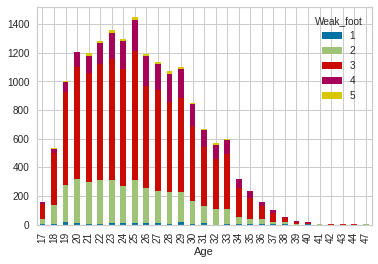

In [ ]:
(df
 .pipe(lambda df2: pd.crosstab(df2.Age, df2.Weak_foot))
 .plot.bar(stacked=True)
)

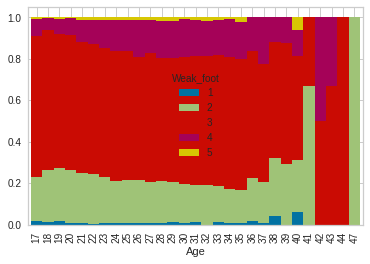

In [ ]:
# Normalize
(df
 .pipe(lambda df2: pd.crosstab(df2.Age, df2.Weak_foot))
 .pipe(lambda df2: df2.div(df2.sum(axis=1), axis=0))
 .plot.bar(width=1, stacked=True)
)

In [ ]:
# need to create numbers for categories, hence .get_dummies call
def tweak_kag2(df):
    df = pd.get_dummies(df, drop_first=True)
    cols = [c.replace(' ', '_') for c in df.columns]
    df.columns = cols
    return df
df = tweak_kag2(df)
df

,Rating,Age,Weak_foot,MONTH,QTR,AGEBIN_2,AGEBIN_3,AGEBIN_4,AGEBIN_5
0,94,32,4,2,1,0,1,0,0
1,93,29,4,6,2,1,0,0,0
2,92,25,5,2,1,1,0,0,0
3,92,30,4,1,1,0,1,0,0
4,92,31,4,3,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
17583,45,19,1,1,1,0,0,0,0
17584,45,19,2,11,4,0,0,0,0
17585,45,18,2,11,4,0,0,0,0
17586,45,21,3,3,1,0,0,0,0


Machine Learning

In [ ]:
df.dtypes

Rating       int64
Age          int64
Weak_foot    int64
MONTH        int64
QTR          int64
AGEBIN_2     uint8
AGEBIN_3     uint8
AGEBIN_4     uint8
AGEBIN_5     uint8
dtype: object

In [ ]:
X = df
std = preprocessing.StandardScaler()
X_std = pd.DataFrame(std.fit_transform(X), columns=X.columns)
X_std

,Rating,Age,Weak_foot,MONTH,QTR,AGEBIN_2,AGEBIN_3,AGEBIN_4,AGEBIN_5
0,3.929769,1.397344,1.625071,-1.117327,-1.159640,-0.837140,2.105172,-0.143939,-0.022627
1,3.788582,0.756330,1.625071,0.043477,-0.262295,1.194544,-0.475021,-0.143939,-0.022627
2,3.647395,-0.098356,3.149676,-1.117327,-1.159640,1.194544,-0.475021,-0.143939,-0.022627
3,3.647395,0.970001,1.625071,-1.407528,-1.159640,-0.837140,2.105172,-0.143939,-0.022627
4,3.647395,1.183672,1.625071,-0.827126,-1.159640,-0.837140,2.105172,-0.143939,-0.022627
...,...,...,...,...,...,...,...,...,...
17583,-2.988389,-1.380384,-2.948741,-1.407528,-1.159640,-0.837140,-0.475021,-0.143939,-0.022627
17584,-2.988389,-1.380384,-1.424137,1.494483,1.532394,-0.837140,-0.475021,-0.143939,-0.022627
17585,-2.988389,-1.594055,-1.424137,1.494483,1.532394,-0.837140,-0.475021,-0.143939,-0.022627
17586,-2.988389,-0.953041,0.100467,-0.827126,-1.159640,-0.837140,-0.475021,-0.143939,-0.022627


In [ ]:
X_std.mean

<bound method DataFrame.mean of          Rating       Age  Weak_foot  ...  AGEBIN_3  AGEBIN_4   AGEBIN_5
0      3.929769  1.397344   1.625071  ...  2.105172 -0.143939  -0.022627
1      3.788582  0.756330   1.625071  ... -0.475021 -0.143939  -0.022627
2      3.647395 -0.098356   3.149676  ... -0.475021 -0.143939  -0.022627
3      3.647395  0.970001   1.625071  ...  2.105172 -0.143939  -0.022627
4      3.647395  1.183672   1.625071  ...  2.105172 -0.143939  -0.022627
...         ...       ...        ...  ...       ...       ...        ...
17583 -2.988389 -1.380384  -2.948741  ... -0.475021 -0.143939  -0.022627
17584 -2.988389 -1.380384  -1.424137  ... -0.475021 -0.143939  -0.022627
17585 -2.988389 -1.594055  -1.424137  ... -0.475021 -0.143939  -0.022627
17586 -2.988389 -0.953041   0.100467  ... -0.475021 -0.143939  -0.022627
17587 -2.988389  4.602414  -1.424137  ... -0.475021 -0.143939  44.195274

[17588 rows x 9 columns]>

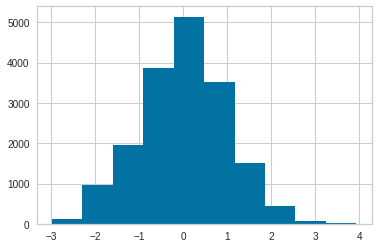

In [ ]:
X_std.Rating.hist()

In [ ]:
pca = decomposition.PCA()
pca_X = pd.DataFrame(pca.fit_transform(X_std), columns=[f'PC{i+1}' for i in range(len(X.columns))])
pca_X

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,4.294053,1.055073,0.433798,-1.747019,-0.113176,0.763034,2.090798,0.155611,-0.021545
1,2.022131,1.101835,3.080362,-0.772947,-0.050523,0.646472,1.846764,-0.219321,-0.206154
2,2.564584,-0.255902,3.357565,-1.451067,-0.015131,2.134586,1.681787,0.306029,-0.021243
3,4.071042,0.658347,0.304529,-1.787489,-0.111988,0.863869,2.027067,0.411608,0.181765
4,3.950882,1.072811,0.325190,-1.747836,-0.102804,0.814272,1.950570,0.277087,-0.227885
...,...,...,...,...,...,...,...,...,...
17583,-1.545057,-3.244908,-2.491733,1.132951,-0.054868,-1.698605,-0.684184,0.111048,0.164098
17584,-3.593956,0.169795,-1.927096,0.604630,0.058761,-0.525426,-1.039215,0.095154,0.017639
17585,-3.708669,0.091261,-1.930930,0.566773,0.054380,-0.486832,-0.961769,0.226964,0.016906
17586,-1.107164,-2.388230,-1.652806,0.130055,0.088025,0.781288,-1.563699,-0.160685,-0.241164


In [ ]:
pca.explained_variance_ratio_

array([0.22538824, 0.21634318, 0.15623977, 0.12052192, 0.11142899,
       0.10363236, 0.05796982, 0.00537591, 0.00309981])

In [ ]:
# Components
# First component is .49 * Age + .21 * Edu + .09 * Exp ... etc
pca.components_[0]

array([ 0.39317291,  0.53686691,  0.14539504, -0.4046729 , -0.40720267,
        0.02121854,  0.41866438,  0.17012553,  0.04245365])

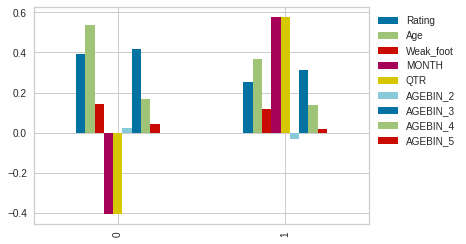

In [ ]:
(pd.DataFrame(pca.components_, columns=X.columns)
 .iloc[:2]
 .plot.bar()
 .legend(bbox_to_anchor=(1,1)))

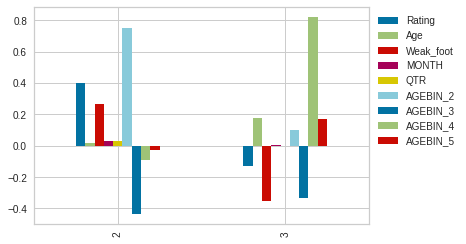

In [ ]:
(pd.DataFrame(pca.components_, columns=X.columns)
 .iloc[2:4]
 .plot.bar()
 .legend(bbox_to_anchor=(1,1)))

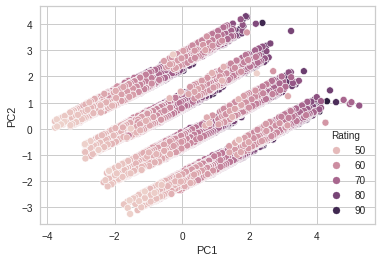

In [ ]:
sns.scatterplot(x='PC1', y='PC2',
                data=pca_X.assign(Rating=X.Rating),
                hue='Rating')

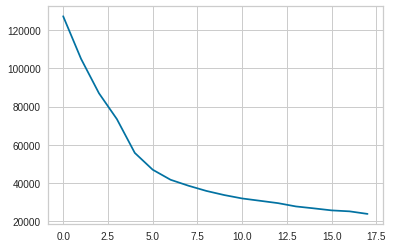

In [ ]:
inerts = []
for i in range(2, 20):
    k = cluster.KMeans(n_clusters=i, random_state=42)
    k.fit(X_std)
    inerts.append(k.inertia_)

pd.Series(inerts).plot()

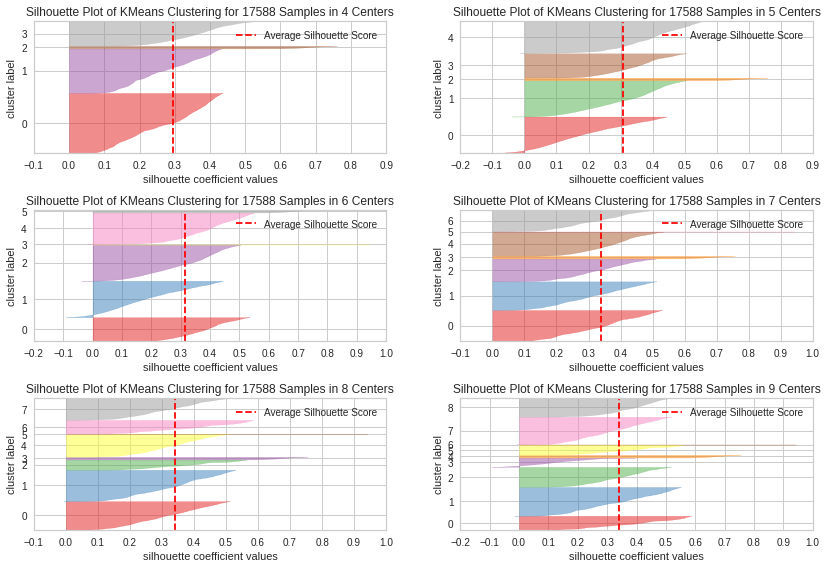

In [ ]:
start, end = 4, 10
cols = 2
rows = ((end - start) // cols)
fix, axes = plt.subplots(rows, cols, figsize=(12,8))
axes = axes.reshape(cols * rows)
for i, k in enumerate(range(start, end), 0):
    ax = axes[i]
    sil = SilhouetteVisualizer(cluster.KMeans(n_clusters=k, random_state=42), ax=ax)
    sil.fit(X_std)
    sil.finalize()
plt.tight_layout()

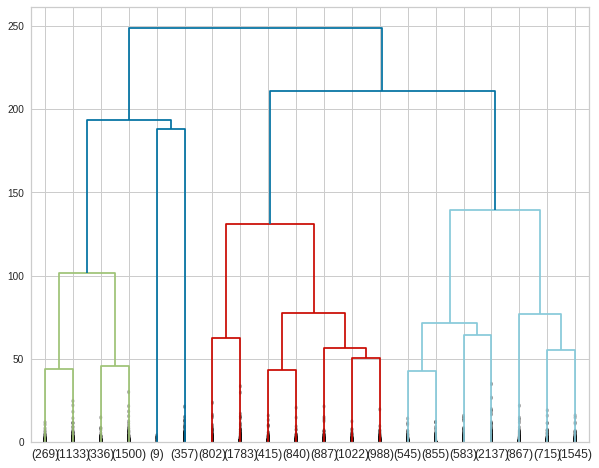

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
hierarchy.dendrogram(hierarchy.linkage(X_std, method='ward'), labels=X_std.index,
                    truncate_mode='lastp', p=20, show_contracted=True)
pass  # here to hide return value of above

In [ ]:
# going to choose 9 clusters
k9 = cluster.KMeans(n_clusters=9, random_state=42)
k9.fit(X_std)
labels = k9.predict(X_std)

In [ ]:
labels

array([0, 3, 3, ..., 2, 7, 6], dtype=int32)

In [ ]:
X.assign(label=labels)


,Rating,Age,Weak_foot,MONTH,QTR,AGEBIN_2,AGEBIN_3,AGEBIN_4,AGEBIN_5,label
0,94,32,4,2,1,0,1,0,0,0
1,93,29,4,6,2,1,0,0,0,3
2,92,25,5,2,1,1,0,0,0,3
3,92,30,4,1,1,0,1,0,0,0
4,92,31,4,3,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
17583,45,19,1,1,1,0,0,0,0,7
17584,45,19,2,11,4,0,0,0,0,2
17585,45,18,2,11,4,0,0,0,0,2
17586,45,21,3,3,1,0,0,0,0,7


In [ ]:
(X.assign(label=labels)
  .groupby('label')
  .agg(['mean', 'var'])
  .T
)

label                   0          1  ...          7          8
Rating    mean  69.654196  68.242119  ...  61.588820  67.545123
          var   31.352548  34.512312  ...  41.773896  34.782477
Age       mean  31.865313  26.336951  ...  20.778017  26.336706
          var    2.394684   2.998350  ...   2.750173   2.792656
Weak_foot mean   2.993052   2.861757  ...   2.806504   2.733711
          var    0.419738   0.340408  ...   0.339968   0.218130
MONTH     mean   3.169428   3.079328  ...   3.367374   9.375556
          var    2.816733   2.693886  ...   2.906666   2.781167
QTR       mean   1.407803   1.366925  ...   1.472185   3.465803
          var    0.241629   0.232351  ...   0.249293   0.248931
AGEBIN_2  mean   0.000000   0.999483  ...   0.000537   0.999595
          var    0.000000   0.000517  ...   0.000537   0.000405
AGEBIN_3  mean   1.000000   0.000000  ...   0.000000   0.000000
          var    0.000000   0.000000  ...   0.000000   0.000000
AGEBIN_4  mean   0.000000   0.000000  ...   0.000000   0.000000
          var    0.000000   0.000000  ...   0.000000   0.000000
AGEBIN_5  mean   0.000000   0.000000  ...   0.000000   0.000000
          var    0.000000   0.000000  ...   0.000000   0.000000

[18 rows x 9 columns]

In [ ]:
pd.Series(labels).value_counts().sort_index()

0    1871
1    3870
2    2687
3    1235
4     357
5    1367
6       9
7    3721
8    2471
dtype: int64

In [ ]:
(X.assign(label=labels)
  .groupby('label')
  .mean()
  .T
 .style.background_gradient(cmap='RdBu', axis=1)
)

label,0,1,2,3,4,5,6,7,8
Rating,69.654196,68.242119,61.360997,71.622672,68.619048,69.386247,61.777778,61.588820,67.545123
Age,31.865313,26.336951,20.675847,25.204049,37.030812,31.868325,43.555556,20.778017,26.336706
Weak_foot,2.993052,2.861757,2.781913,4.102024,2.904762,3.018288,3.111111,2.806504,2.733711
MONTH,3.169428,3.079328,9.336435,7.466397,5.994398,9.407462,4.555556,3.367374,9.375556
QTR,1.407803,1.366925,3.453666,2.832389,2.310924,3.460863,1.888889,1.472185,3.465803
AGEBIN_2,0.000000,0.999483,0.000000,0.734413,0.000000,0.000000,0.000000,0.000537,0.999595
AGEBIN_3,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
AGEBIN_4,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
AGEBIN_5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
